<a href="https://colab.research.google.com/github/pras-4795/JPMCColab/blob/main/29_Aug_Mushroom_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mushrooms = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv")

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = mushrooms.iloc[:,1:]
y = mushrooms.iloc[:,0]

In [5]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [6]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'e': 0, 'p': 1}


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, categories='auto')
result = pd.DataFrame(encoder.fit_transform(X))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# hyperparameter grid. contains linear and polynomial kernels
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}

In [12]:
from sklearn import ensemble
# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [13]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, scoring='accuracy', cv=10)

In [14]:
gscv.fit(result,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy')

In [15]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(gscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 8}",0.966911
10,"{'criterion': 'entropy', 'max_features': 8}",0.966541
5,"{'criterion': 'gini', 'max_features': 12}",0.966172
6,"{'criterion': 'gini', 'max_features': 14}",0.966172
0,"{'criterion': 'gini', 'max_features': 2}",0.966049


<Axes: ylabel='params'>

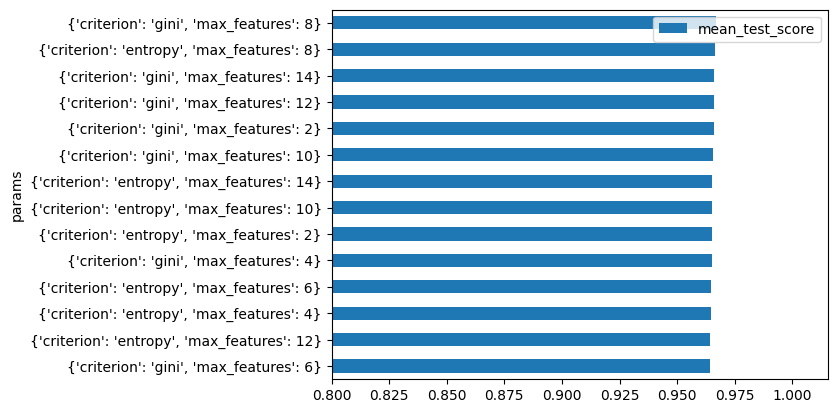

In [16]:
# visualize the result
(
    results.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)

In [17]:
max_features = results.shape[1]

In [18]:
from scipy import stats
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}

In [19]:
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [20]:
rscv.fit(result,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad7cd6a9690>},
                   random_state=100, scoring='accuracy')

In [27]:
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
sorted = distinct_results.sort_values('mean_test_score', ascending=False).head(10)
print(sorted)

                                          params  mean_test_score
29  {'criterion': 'entropy', 'max_features': 11}         0.940660
14   {'criterion': 'entropy', 'max_features': 5}         0.940044
6      {'criterion': 'gini', 'max_features': 18}         0.936842
20  {'criterion': 'entropy', 'max_features': 17}         0.932532
36     {'criterion': 'gini', 'max_features': 14}         0.932409
16  {'criterion': 'entropy', 'max_features': 18}         0.932039
9      {'criterion': 'gini', 'max_features': 17}         0.930438
19   {'criterion': 'entropy', 'max_features': 8}         0.929699
18  {'criterion': 'entropy', 'max_features': 15}         0.928345
21     {'criterion': 'gini', 'max_features': 10}         0.928098


<Axes: ylabel='params'>

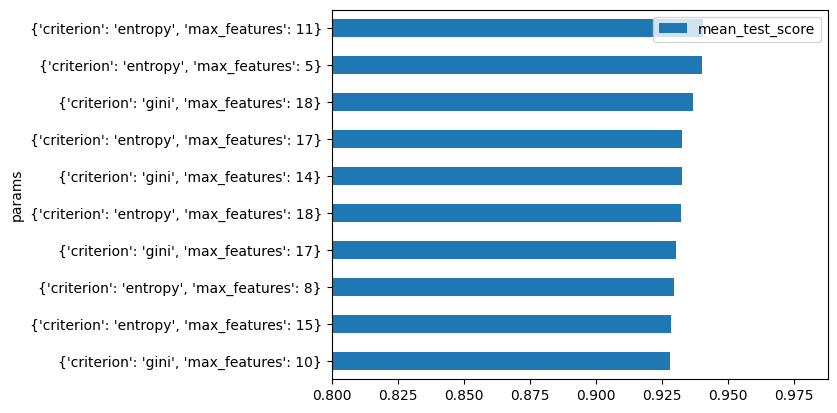

In [28]:
# visualize the result
(
    sorted.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)